# Task
EDA on "netflix_titles.csv"

## Data loading



Load the "netflix_titles.csv" file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('netflix_titles.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please ensure the file is in the correct location.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data exploration

### Subtask:
Explore the dataset to understand its basic characteristics.


In [ ]:
# Data Shape and Columns
print("Data Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Data Types and Non-Null Counts
print("\nData Types and Non-Null Counts:")
print(df.info())

# Descriptive Statistics for Numerical Columns
print("\nDescriptive Statistics:")
print(df.describe(include='number'))

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Duplicate Rows
print("\nDuplicate Rows:")
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Preliminary Content Inspection (sample values)
print("\nPreliminary Content Inspection (Sample Values):")
for col in df.columns:
    print(f"\nColumn: {col}")
    if df[col].dtype == 'object':  # Check for string/object type columns
        print(df[col].unique()[:5])  # Print first five unique values
    else:
        print(df[col].head())

Data Shape: (8807, 12)

Column Names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Descriptive Statistics:
       rele

## Data analysis


**Reasoning**:
I need to analyze each column, calculate descriptive statistics for numerical columns, analyze categorical features, and examine text features. I will also consider data type issues and suggest improvements.



In [ ]:
# Column Descriptions
print("Column Descriptions:")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Unique Values: {df[col].nunique()}")
    if df[col].dtype == 'object':
        print(f"Sample Values: {df[col].unique()[:5]}")
    else:
        print(df[col].describe())

# Numerical Feature Analysis
print("\nNumerical Feature Analysis (release_year):")
print(df['release_year'].describe())
print("Explanation: These statistics reveal the distribution of release years.")

# Categorical Feature Analysis
print("\nCategorical Feature Analysis:")
for col in ['type', 'rating', 'country']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
print("\nTop 5 countries:")
print(df['country'].value_counts().head(5))

# Text Feature Analysis
print("\nText Feature Analysis:")
print("\nListed_in (Genres):")
print(df['listed_in'].str.split(',').explode().value_counts().head(10))
print("\nDescription (Word Frequency - basic):")
from collections import Counter
word_counts = Counter(" ".join(df['description'].dropna().astype(str)).lower().split())
print(word_counts.most_common(10))

# Data Type Considerations
print("\nData Type Considerations:")
print("'date_added' is currently a string.  It should be converted to datetime objects.")
print("'duration' is a string and needs to be converted to numerical data with units (minutes or seasons).")


Column Descriptions:

Column: show_id
Data Type: object
Unique Values: 8807
Sample Values: ['s1' 's2' 's3' 's4' 's5']

Column: type
Data Type: object
Unique Values: 2
Sample Values: ['Movie' 'TV Show']

Column: title
Data Type: object
Unique Values: 8807
Sample Values: ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands'
 'Jailbirds New Orleans' 'Kota Factory']

Column: director
Data Type: object
Unique Values: 4528
Sample Values: ['Kirsten Johnson' nan 'Julien Leclercq' 'Mike Flanagan'
 'Robert Cullen, José Luis Ucha']

Column: cast
Data Type: object
Unique Values: 7692
Sample Values: [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Nou

## Data visualization

### Subtask:
Create visualizations to illustrate key aspects of the Netflix dataset.


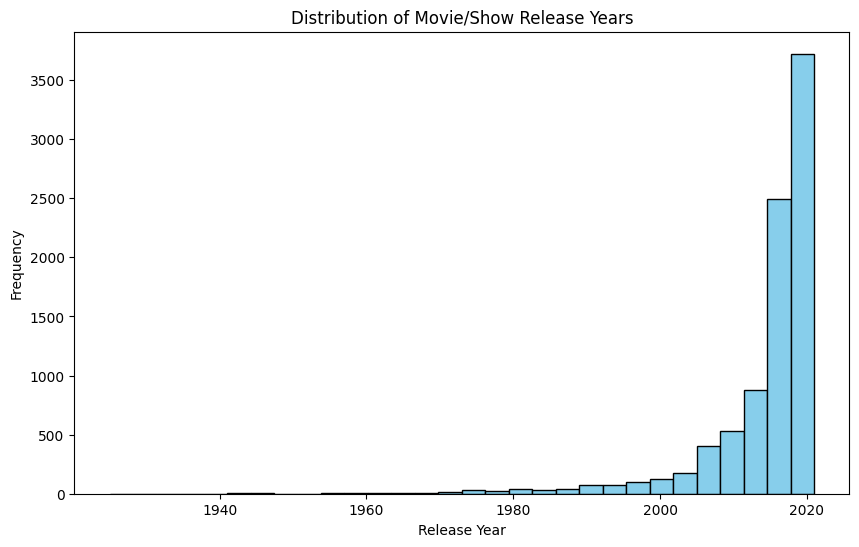

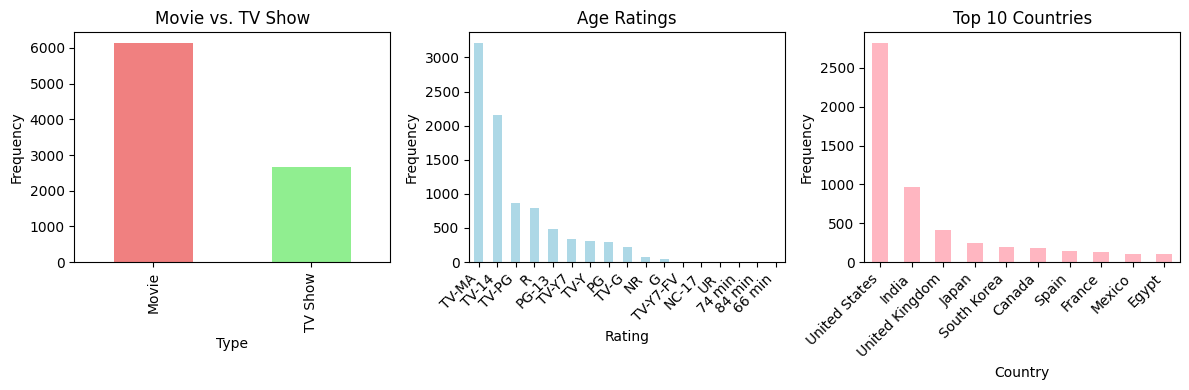

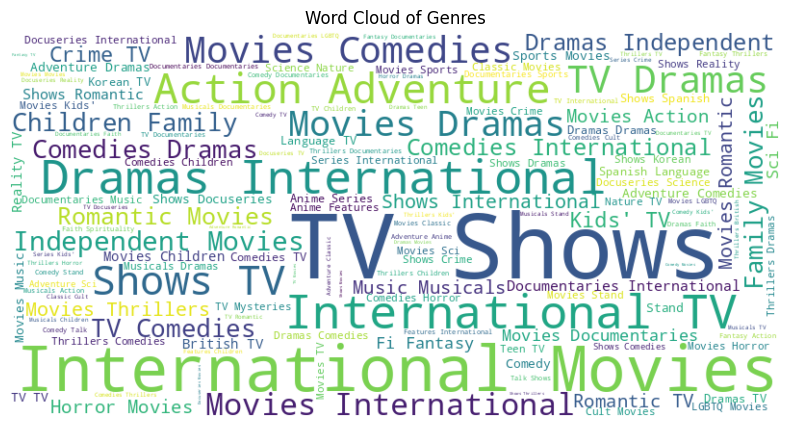

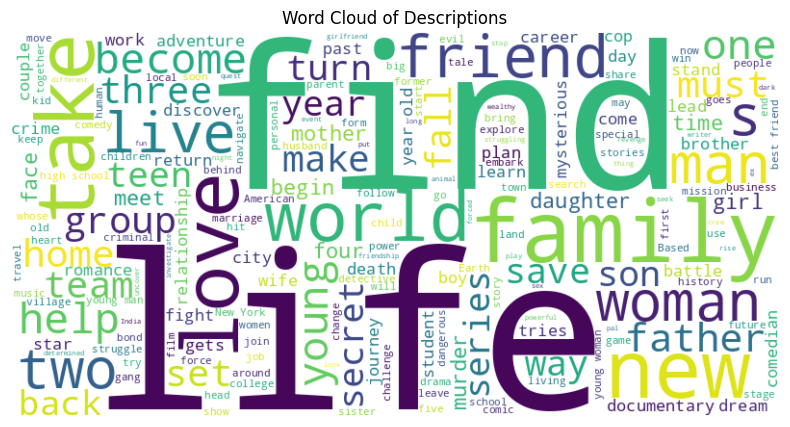

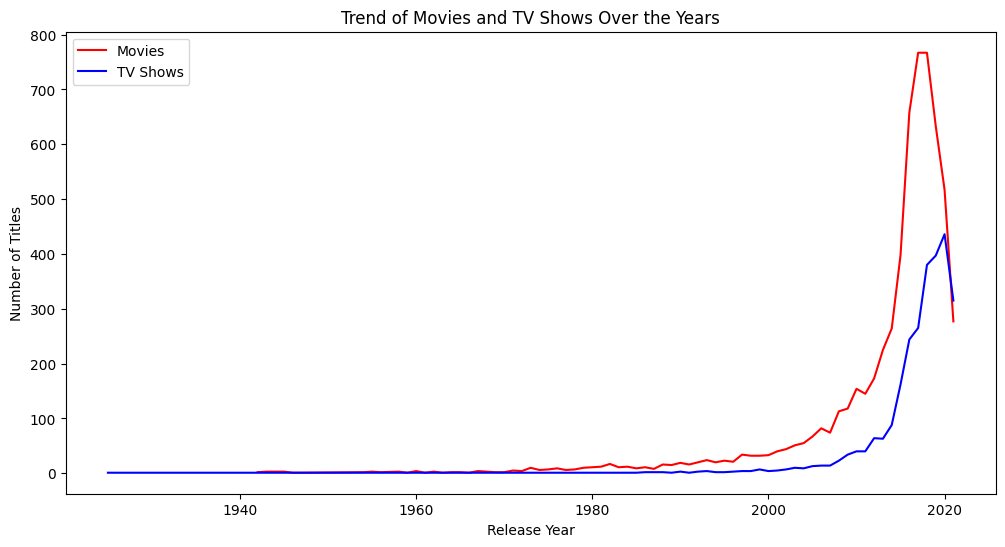

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# 1. Histogram for release_year
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie/Show Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.savefig('release_year_histogram.png')
plt.show()

# 2. Bar Charts for Categorical Data
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
df['type'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Movie vs. TV Show')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df['rating'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Age Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.subplot(1, 3, 3)
df['country'].value_counts().head(10).plot(kind='bar', color='lightpink')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('categorical_bar_charts.png')
plt.show()

# 3. Word Clouds
text1 = " ".join(genre for genre in df['listed_in'].dropna())
wordcloud1 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Genres')
plt.savefig('genre_wordcloud.png')
plt.show()

text2 = " ".join(desc for desc in df['description'].dropna())
wordcloud2 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.savefig('description_wordcloud.png')
plt.show()


# 4. Combined Visualization
movies_per_year = df[df['type'] == 'Movie'].groupby('release_year').size()
tvshows_per_year = df[df['type'] == 'TV Show'].groupby('release_year').size()
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', color='red')
plt.plot(tvshows_per_year.index, tvshows_per_year.values, label='TV Shows', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Trend of Movies and TV Shows Over the Years')
plt.legend()
plt.savefig('combined_visualization.png')
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the data analysis task.

### 2. Data Analysis Key Findings

* **Data Overview:** The dataset contains 8807 rows and 12 columns, primarily consisting of string data.  The `release_year` is an integer.
* **Missing Data:** Significant missing values exist in several columns, with 'director' having the most (2634), followed by 'cast' (825) and 'country' (831).
* **Release Year Distribution:** The average release year is approximately 2014, spanning from 1925 to 2021.
* **Content Type:** Movies constitute a larger portion of the dataset compared to TV shows.
* **Content Rating:**  "TV-MA" is the most frequent rating.
* **Top Countries:** The United States, India, United Kingdom, and others dominate the content origin.
* **Popular Genres:**  Documentaries, International Movies, Comedies, Dramas, and others are among the most frequent genres.
* **Common Themes:** Word frequency analysis of descriptions reveals common words.
* **Data Type Improvements Needed:**  `date_added` should be converted to datetime objects, and `duration` should be converted to a numerical format with units.

### 3. Insights or Next Steps

* **Address Missing Data:** Investigate and handle missing values in 'director', 'cast', and 'country' columns. Consider imputation or removal based on the impact on downstream analysis.
* **Feature Engineering:** Convert 'date_added' and 'duration' to more usable data types.  Extract additional features from text fields (e.g., keywords from descriptions, actors from cast) for more in-depth analysis.
